# Академия Аналитиков Авито

# Эконометрика

# Домашняя работа №3

## №1 (40 баллов)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.api as sm


In [145]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv('HW_003_001.txt')
df_init = df

In [110]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [112]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

- Ваше задание
    - Провести EDA анализ признаков, которые есть
    - Подумать над feature engineering, сформировать гипотезы
    - Зафиттить логистическую модель и пробит модель
    - Посмотреть на их метрики качества: псевдо $R^2$, confusion matrix, precision, recall, F1-score, ROC AUC
    - Какую модель вы бы выбрали?
    - Посмотреть на профиль среднего "клиента" (наблюдения). Какие переменные надо изменить, чтобы верояность ухода клиента снизилась?
    - Перейдем к предсказаниям:
        - У вас не всегда будут функции типа `LogisticRegressionCV`, поэтому почитайте про [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
        - Подумайте, какие еще признаки можно добавить в вашу модель. На этом этапе не бойтесь кол-ва признаков, чем больше, тем лучше. *{Дополнительно: почитайте про [`RFECV`](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), попробуйте его применить}*
        - При наличии достаточного кол-ва наблюдений, хорошей стратегией является использование только части данных для расчета модели. Используя [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) выделите наблюдения для обучения.
        - Создайте стратифицированные фолды на обучающей выборке
        - На практике нам приходится выбирать между различными метриками качества. В этой задаче будем использовать ROC AUC
        - Используя `GridSearchCV` и [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) подберите оптимальный гиперпараметр для l1, l2 регуляризаций. Помните, что вы хотите, чтобы оптимальный гиперпараметр был выбран согласно метрике ROC AUC. Почитайте, как это сделать в GridSearchCV
        - Нарисуйте графики, как меняется ваш score в зависимости от значения гиперпараметра

In [113]:
df.groupby(by = 'Churn')['Churn'].count()

Churn
False    2850
True      483
Name: Churn, dtype: int64

Классы не сбалансированны


In [114]:
df.groupby(by = 'International plan')['International plan'].count()

International plan
0    3010
1     323
Name: International plan, dtype: int64

In [115]:
df.groupby(by = 'Voice mail plan')['Voice mail plan'].count()

Voice mail plan
0    2411
1     922
Name: Voice mail plan, dtype: int64

Area code это категориальный признак, сделаем из него дамми и заэнкодим штат

In [116]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['State'])
df['State'] = le.transform(df['State'])

In [117]:
df = pd.concat([pd.get_dummies(df['Area code']), df.drop(columns=['Area code'])], axis=1)

In [118]:
df

,408,415,510,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,1,0,16,128,0,1,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0,1,0,35,107,0,1,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,1,0,31,137,0,0,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,1,0,0,35,84,1,0,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,1,0,36,75,1,0,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,0,3,192,0,1,36,156.2,77,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,0,1,0,49,68,0,0,0,231.1,57,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,0,0,1,39,28,0,0,0,180.8,109,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,0,0,1,6,184,1,0,0,213.8,105,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


<AxesSubplot:>

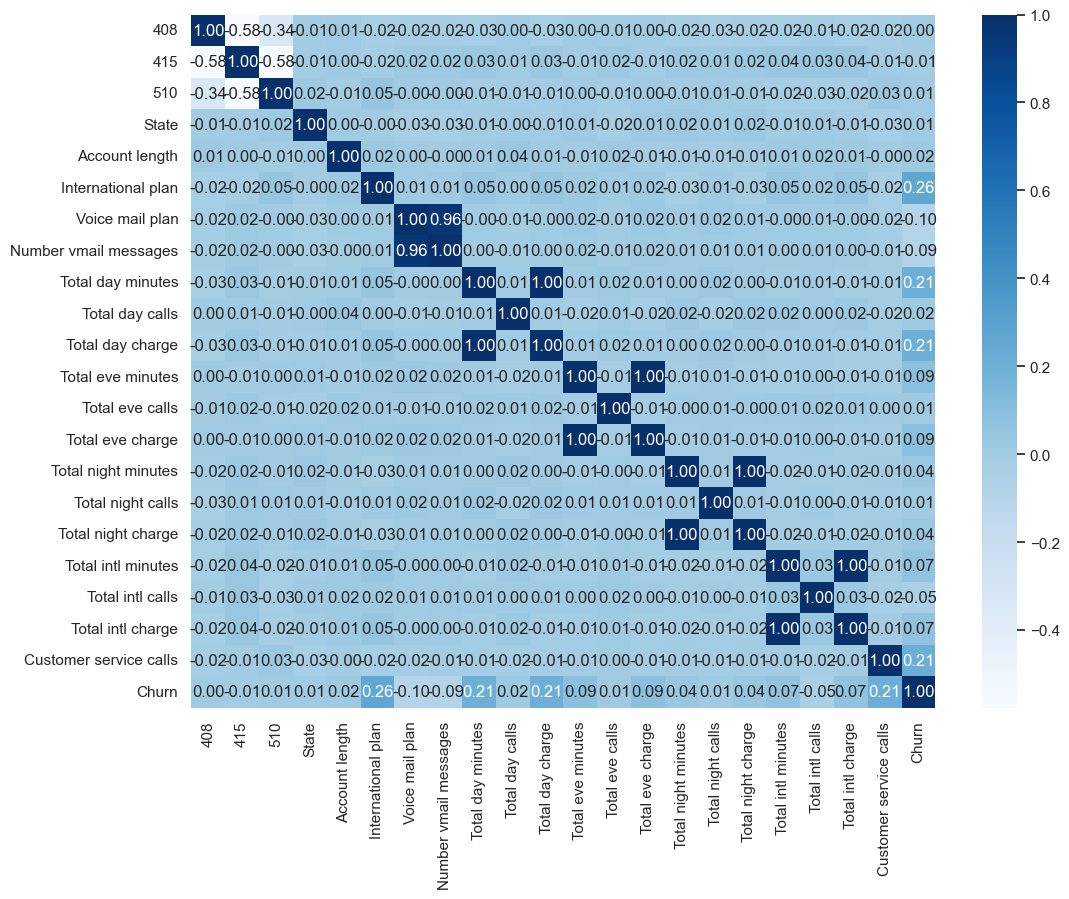

In [119]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')

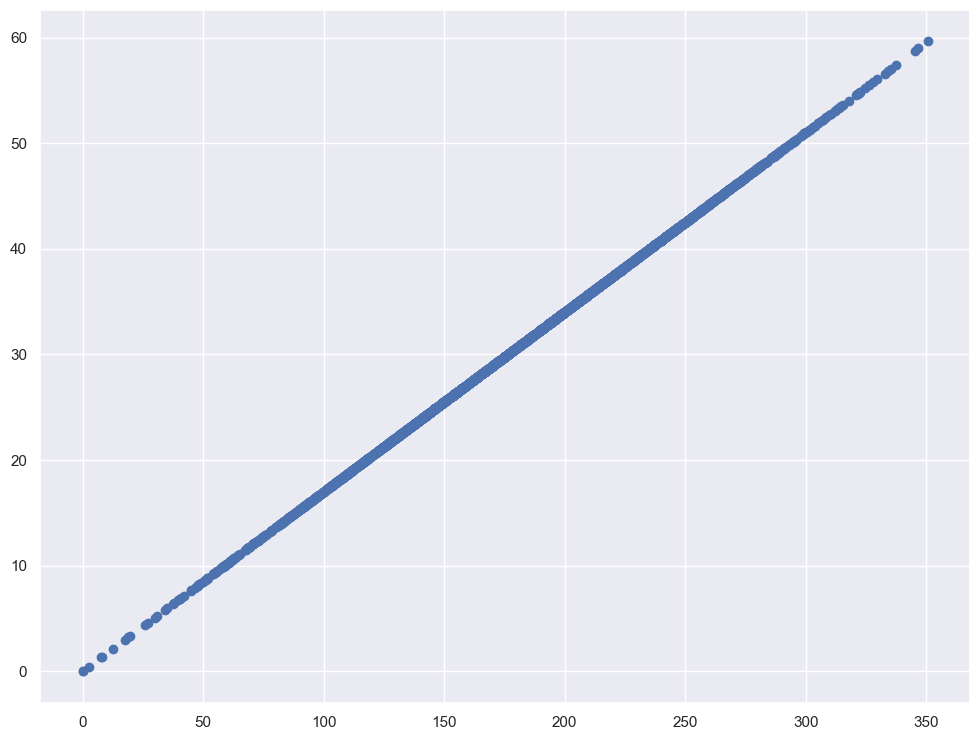

In [120]:
plt.scatter(df['Total day minutes'], df['Total day charge'])

Видно что minutes и charges это одно и то же, дальше дропнем minutes

Зафичу пока без отсева фич

In [121]:
y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

In [122]:
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.323749
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3311
Method:                           MLE   Df Model:                           21
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.2176
Time:                        21:34:38   Log-Likelihood:                -1079.1
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                1.465e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5196        nan        nan        nan         nan         nan
x1            -2.1134        nan        nan        nan         nan         nan
x2            -2.1944        nan        nan        nan         nan         nan
x3            -2.2105        nan        nan        nan         nan         nan
x4             0.0015      0.004      0.406      0.685      -0.006       0.009
x5             0.0008      0.001      0.581      0.561      -0.002       0.004
x6             2.0462      0.146     14.035      0.000       1.760       2.332
x7            -2.0123      0.575     -3.502      0.000      -3.139      -0.886
x8             0.0356      0.018      1.974      0.048       0.000       0.071
x9            -0.2444      3.276     -0.075      0.941      -6.665       6.176
x10            0.0032      0.003      1.152      0.250      -0.002       0.009
x11            1.5141     19.271      0.079      0.937     -36.256      39.284
x12            0.7727      1.638      0.472      0.637      -2.438       3.983
x13            0.0011      0.003      0.388      0.698      -0.004       0.007
x14           -9.0056     19.269     -0.467      0.640     -46.773      28.762
x15           -0.1119      0.877     -0.128      0.898      -1.832       1.608
x16            0.0007      0.003      0.262      0.793      -0.005       0.006
x17            2.5694     19.496      0.132      0.895     -35.642      40.781
x18           -4.1951      5.305     -0.791      0.429     -14.594       6.203
x19           -0.0925      0.025     -3.689      0.000      -0.142      -0.043
x20           15.8620     19.649      0.807      0.420     -22.649      54.373
x21            0.5147      0.039     13.085      0.000       0.438       0.592
==============================================================================
"""

In [123]:
probit_mod = sm.Probit(endog=y, exog=sm.add_constant(X)).fit()
probit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.323718
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                         Probit   Df Residuals:                     3311
Method:                           MLE   Df Model:                           21
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.2177
Time:                        21:34:38   Log-Likelihood:                -1079.0
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                1.324e-113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5042   4.58e+06  -7.65e-07      1.000   -8.97e+06    8.97e+06
x1            -1.1261   4.58e+06  -2.46e-07      1.000   -8.97e+06    8.97e+06
x2            -1.1862   4.58e+06  -2.59e-07      1.000   -8.97e+06    8.97e+06
x3            -1.1893   4.58e+06   -2.6e-07      1.000   -8.97e+06    8.97e+06
x4             0.0011      0.002      0.507      0.612      -0.003       0.005
x5             0.0005      0.001      0.619      0.536      -0.001       0.002
x6             1.1768      0.083     14.261      0.000       1.015       1.339
x7            -0.9993      0.289     -3.456      0.001      -1.566      -0.433
x8             0.0175      0.009      1.912      0.056      -0.000       0.035
x9             0.1073      1.795      0.060      0.952      -3.411       3.625
x10            0.0015      0.001      1.002      0.316      -0.001       0.004
x11           -0.5913     10.558     -0.056      0.955     -21.285      20.102
x12            0.4871      0.894      0.545      0.586      -1.265       2.239
x13            0.0008      0.002      0.529      0.597      -0.002       0.004
x14           -5.6869     10.516     -0.541      0.589     -26.298      14.925
x15           -0.0376      0.476     -0.079      0.937      -0.970       0.895
x16            0.0004      0.002      0.230      0.818      -0.003       0.003
x17            0.8759     10.572      0.083      0.934     -19.845      21.597
x18           -2.0956      2.877     -0.728      0.466      -7.734       3.543
x19           -0.0438      0.013     -3.393      0.001      -0.069      -0.018
x20            7.9257     10.655      0.744      0.457     -12.958      28.809
x21            0.2920      0.021     13.831      0.000       0.251       0.333
==============================================================================
"""

Видим что Area Code вышли неинформативными, дропну их и минуты

In [124]:
df.columns

Index([                     408,                      415,
                            510,                  'State',
               'Account length',     'International plan',
              'Voice mail plan',  'Number vmail messages',
            'Total day minutes',        'Total day calls',
             'Total day charge',      'Total eve minutes',
              'Total eve calls',       'Total eve charge',
          'Total night minutes',      'Total night calls',
           'Total night charge',     'Total intl minutes',
             'Total intl calls',      'Total intl charge',
       'Customer service calls',                  'Churn'],
      dtype='object')

In [125]:
df

,408,415,510,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,1,0,16,128,0,1,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,0,1,0,35,107,0,1,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,1,0,31,137,0,0,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,1,0,0,35,84,1,0,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,1,0,36,75,1,0,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,0,3,192,0,1,36,156.2,77,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,0,1,0,49,68,0,0,0,231.1,57,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,0,0,1,39,28,0,0,0,180.8,109,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,0,0,1,6,184,1,0,0,213.8,105,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [126]:
df.drop(columns=[408, 510, 415, 'Total day minutes', 'Total night minutes', 'Total eve minutes', 'Total intl minutes', 'State'], inplace=True)


In [127]:
y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

In [128]:
logit_mod = sm.Logit(endog=y, exog=sm.add_constant(X)).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.323983
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3319
Method:                           MLE   Df Model:                           13
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.2170
Time:                        21:34:39   Log-Likelihood:                -1079.8
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                1.508e-119
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6559      0.724    -11.951      0.000     -10.075      -7.236
x1             0.0008      0.001      0.599      0.549      -0.002       0.004
x2             2.0373      0.145     14.016      0.000       1.752       2.322
x3            -2.0076      0.573     -3.502      0.000      -3.131      -0.884
x4             0.0353      0.018      1.965      0.049    9.29e-05       0.071
x5             0.0032      0.003      1.166      0.244      -0.002       0.009
x6             0.0764      0.006     11.986      0.000       0.064       0.089
x7             0.0011      0.003      0.386      0.700      -0.004       0.007
x8             0.0852      0.013      6.338      0.000       0.059       0.112
x9             0.0007      0.003      0.243      0.808      -0.005       0.006
x10            0.0822      0.025      3.331      0.001       0.034       0.131
x11           -0.0921      0.025     -3.681      0.000      -0.141      -0.043
x12            0.3253      0.076      4.309      0.000       0.177       0.473
x13            0.5137      0.039     13.092      0.000       0.437       0.591
==============================================================================
"""

In [129]:
probit_mod = sm.Probit(endog=y, exog=sm.add_constant(X)).fit()
probit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.324008
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3333
Model:                         Probit   Df Residuals:                     3319
Method:                           MLE   Df Model:                           13
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                  0.2170
Time:                        21:34:39   Log-Likelihood:                -1079.9
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                1.633e-119
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6447      0.380    -12.209      0.000      -5.390      -3.899
x1             0.0005      0.001      0.640      0.522      -0.001       0.002
x2             1.1718      0.082     14.240      0.000       1.011       1.333
x3            -0.9978      0.288     -3.464      0.001      -1.562      -0.433
x4             0.0174      0.009      1.908      0.056      -0.000       0.035
x5             0.0015      0.001      1.028      0.304      -0.001       0.004
x6             0.0399      0.003     12.087      0.000       0.033       0.046
x7             0.0008      0.002      0.509      0.611      -0.002       0.004
x8             0.0432      0.007      5.987      0.000       0.029       0.057
x9             0.0003      0.002      0.206      0.837      -0.003       0.003
x10            0.0412      0.014      3.043      0.002       0.015       0.068
x11           -0.0437      0.013     -3.391      0.001      -0.069      -0.018
x12            0.1635      0.041      3.975      0.000       0.083       0.244
x13            0.2910      0.021     13.817      0.000       0.250       0.332
==============================================================================
"""

Посчитаем метрики

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score, make_scorer

In [131]:
y_pred_logit = np.where(logit_mod.predict(sm.add_constant(X)) > 0.5, 1, 0)
cf_logit = confusion_matrix(y_true = df['Churn'], y_pred=y_pred_logit)
cf_logit

array([[2771,   79],
       [ 379,  104]], dtype=int64)

In [132]:
TP_logit = np.sum((y_pred_logit == 1) & (df['Churn'] == 1))
FP_logit = np.sum((y_pred_logit == 0) & (df['Churn'] == 1))
FN_logit = np.sum((y_pred_logit == 1) & (df['Churn'] == 0))
TN_logit = np.sum((y_pred_logit == 0) & (df['Churn'] == 0))

precision_logit = TP_logit / (TP_logit + FP_logit)
recall_logit = TP_logit / (TP_logit + FN_logit)
f1_logit = f1_score(y_true = df['Churn'], y_pred= y_pred_logit)
print(f'Metrics for logit precision: {precision_logit:.3}, recall: {recall_logit:.3}, f1: {f1_logit:.3}')

Metrics for logit precision: 0.215, recall: 0.568, f1: 0.312


In [133]:
y_pred_probit = np.where(probit_mod.predict(sm.add_constant(X)) > 0.5, 1, 0)
cf_probit = confusion_matrix(y_true = df['Churn'], y_pred=y_pred_probit)

In [134]:
TP_probit = np.sum((y_pred_probit == 1) & (df['Churn'] == 1))
FP_probit = np.sum((y_pred_probit == 0) & (df['Churn'] == 1))
FN_probit = np.sum((y_pred_probit == 1) & (df['Churn'] == 0))
TN_probit = np.sum((y_pred_probit == 0) & (df['Churn'] == 0))

precision_probit = TP_probit / (TP_probit + FP_probit)
recall_probit = TP_probit / (TP_probit + FN_probit)
f1_probit = f1_score(y_true = df['Churn'], y_pred= y_pred_probit)
print(f'Metrics for logit precision: {precision_probit:.3}, recall: {recall_probit:.3}, f1: {f1_probit:.3}')

Metrics for logit precision: 0.188, recall: 0.555, f1: 0.281


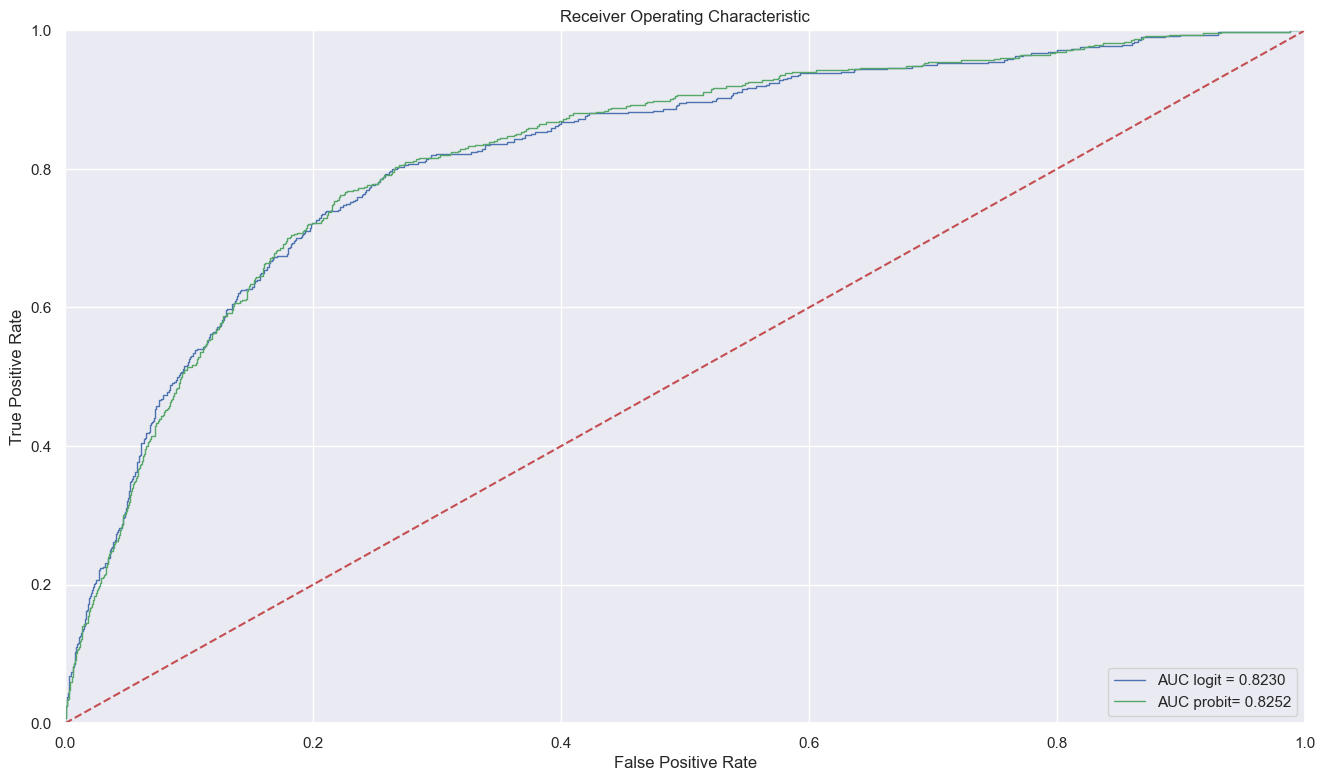

In [135]:
plt.figure(figsize=(16, 9), dpi=100)
plt.rcParams.update({'font.size': 14})

fpr_log, tpr_log, threshold_log = roc_curve(df['Churn'], logit_mod.predict(sm.add_constant(X)))
roc_auc_log = auc(fpr_log, tpr_log)
fpr_prob, tpr_prob, threshold_prob = roc_curve(df['Churn'], probit_mod.predict(sm.add_constant(X)))
roc_auc_prob = auc(fpr_prob, tpr_prob)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_log, tpr_log, 'b', label = 'AUC logit = %0.4f' % roc_auc_log, linewidth=1)
plt.plot(fpr_prob, tpr_prob, 'g', label = 'AUC probit= %0.4f' % roc_auc_prob, linewidth=1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

У logit-а все метрики кроме ROC AUC выше, выбрал бы его

Профиль медианного клиента который уходит

In [136]:
df_init[df_init['Churn'] == 1].median(axis=0, numeric_only=True)

State                      26.00
Account length            103.00
Area code                 415.00
International plan          0.00
Voice mail plan             0.00
Number vmail messages       0.00
Total day minutes         217.60
Total day calls           103.00
Total day charge           36.99
Total eve minutes         211.30
Total eve calls           101.00
Total eve charge           17.96
Total night minutes       204.80
Total night calls         100.00
Total night charge          9.22
Total intl minutes         10.60
Total intl calls            4.00
Total intl charge           2.86
Customer service calls      2.00
Churn                       1.00
dtype: float64

Профиль медианного клиента который не уходит

In [137]:
df_init[df_init['Churn'] == 0].median(axis=0, numeric_only=True)

State                      26.00
Account length            100.00
Area code                 415.00
International plan          0.00
Voice mail plan             0.00
Number vmail messages       0.00
Total day minutes         177.20
Total day calls           100.00
Total day charge           30.12
Total eve minutes         199.60
Total eve calls           100.00
Total eve charge           16.97
Total night minutes       200.25
Total night calls         100.00
Total night charge          9.01
Total intl minutes         10.20
Total intl calls            4.00
Total intl charge           2.75
Customer service calls      1.00
Churn                       0.00
dtype: float64

Видно, что уходящие клиенты в среднем меньше  больше пользуются связью, возможно их просто не устраивают тарифы 

In [140]:
y = df['Churn'].astype('int').values
X = df.drop('Churn', axis=1).values

In [142]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [194]:
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y,
                                                  random_state=42,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  )

In [206]:
grid_values = {'penalty': ['l1','l2'], "C": np.logspace(-3, 3, 7)}
lr = LogisticRegression(max_iter= 10000, solver='liblinear')
model_lr = GridSearchCV(lr, param_grid=grid_values, cv=5, scoring=make_scorer(roc_auc_score))
model_lr.fit(xtrain, ytrain)

print("tuned hyperparameters : (best parameters) ", model_lr.best_params_)
print("ROC AUC:", model_lr.best_score_)

tuned hyperparameters : (best parameters)  {'C': 1000.0, 'penalty': 'l1'}
AUC : 0.5925112168533221


In [207]:
logreg = LogisticRegression(**model_lr.best_params_, max_iter= 10000, solver='liblinear')
logreg.fit(xtrain, ytrain)
print("ROC AUC:", logreg.score(xvalid, yvalid))

AUC: 0.8590704647676162


ROC AUC вырос почти на 4 десятых 

In [209]:
scores = model_lr.cv_results_['mean_test_score']

In [210]:
params = model_lr.cv_results_['params']

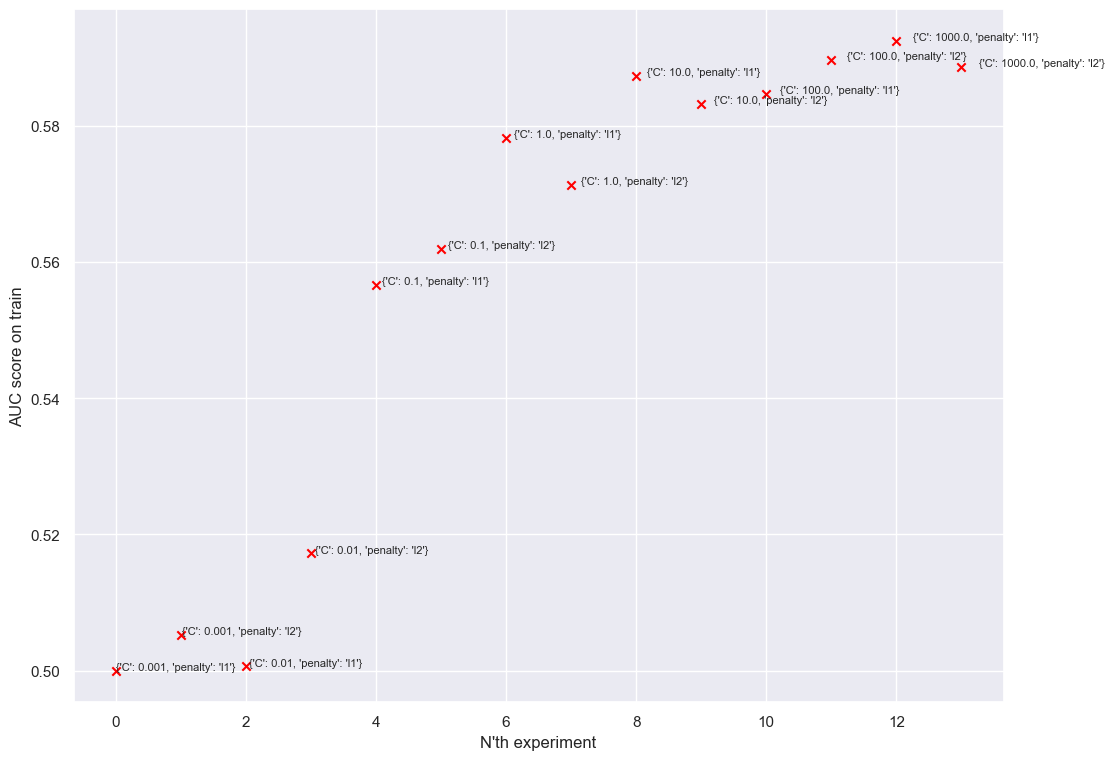

In [212]:
plt.rcParams.update({'font.size': 8})

for num, val in enumerate(scores):
    plt.annotate(params[num], (num, val), textcoords='offset points')
    plt.scatter(num, val, marker='x', color='red')

plt.ylabel('ROC AUC score on train')
plt.xlabel("N'th experiment")
plt.show()

- Ваше задание
    - Провести EDA анализ признаков, которые есть
    - Подумать над feature engineering, сформировать гипотезы
    - Зафиттить логистическую модель и пробит модель
    - Посмотреть на их метрики качества: псевдо $R^2$, confusion matrix, precision, recall, F1-score, ROC AUC
    - Какую модель вы бы выбрали?
    - Посмотреть на профиль среднего "клиента" (наблюдения). Какие переменные надо изменить, чтобы верояность ухода клиента снизилась?
    - Перейдем к предсказаниям:
        - У вас не всегда будут функции типа `LogisticRegressionCV`, поэтому почитайте про [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
        - Подумайте, какие еще признаки можно добавить в вашу модель. На этом этапе не бойтесь кол-ва признаков, чем больше, тем лучше. *{Дополнительно: почитайте про [`RFECV`](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py), попробуйте его применить}*
        - При наличии достаточного кол-ва наблюдений, хорошей стратегией является использование только части данных для расчета модели. Используя [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) выделите наблюдения для обучения.
        - Создайте стратифицированные фолды на обучающей выборке
        - На практике нам приходится выбирать между различными метриками качества. В этой задаче будем использовать ROC AUC
        - Используя `GridSearchCV` и [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) подберите оптимальный гиперпараметр для l1, l2 регуляризаций. Помните, что вы хотите, чтобы оптимальный гиперпараметр был выбран согласно метрике ROC AUC. Почитайте, как это сделать в GridSearchCV
        - Нарисуйте графики, как меняется ваш score в зависимости от значения гиперпараметра

# №3 (60 баллов)

- Ладно, пришла пора для чего более сложного
- В этой задаче вы сами все решаете. Более того, у вас будут даже чужие ноутбуки
- Если вы проведете такой же анализ, что и выше, то балл за это задание будет равен 10/40
- Чтобы получить максимальный балл за это задание, то вам нужно будет провести полноценное исследование

- Итак, представьте себе следующую ситуацию
- Вы участвуете в создании продукта/модели по предсказанию инсульта 
- Вы - главный аналитик, который отвечает за создание модели и презентацию ее результатов
- Проблема в том, что вы единственный аналитик в команде. Все остальные члены команды **не имеют математического бэкграунда, они не знают никаких моделей, они никогда не занимались программированием**. Они все медики.
- Вы знаете, что для тестривания модели на первом этапе подойдет [этот](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) замечательный датасет. Там есть примеры различного анализа и моделей
- Но вы не можете просто взять примеры оттуда:
    - Во-первых, ваша модель должна быть логистической или пробит 
    - Во-вторых, посмотрите на то, как меняется вероятность инсульта в зависимости от характеристик пациента
    - В-третьих, подумайте над тем, как можно поменять/улучшить эту модель, чтобы обеспечить **наилучшее предсказание**. Подумайте, какую метрику вы будете использовать для этой задачи. Обоснуйте выбор метрики.
- Еще важный момент. Вы отправите, получившееся исследование команде, поэтому оно не должно быть большим (время на прочтение и понимание того, что происходит, не должно занимать более 10-15 минут). Помните, что у команды есть и другие задачи, поэтому позаботьтесь, чтобы исследование было:
    - Структурированным. Можете использовать [классический](https://blogs.lse.ac.uk/impactofsocialsciences/2018/05/21/writing-a-page-turner-how-to-tell-a-story-in-your-scientific-paper/) подход к научному исследованию и добавить то, как делают [консультанты](https://strategyu.co/mckinsey-structured-problem-solving-secrets/)
    - Отвечало на поставленную задачу
    - Было самодостаточным (в одном jupyter файле, проще говоря)
    - Воспроизводимым (увижу, что явно не прописываете `seed`, если/где надо, поставлю 0 за это задание)
    - Было не стыдно показать другим людям (если графики будут без подписей осей и названия, как минимум, поставлю 0)